In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [2]:
timeage = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/Time/TimeAge.csv")
region = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/Patient/PatientRoute.csv")
time = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/Time/Time.csv")
weather = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/Weather.csv")
searchtrend = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/SearchTrend.csv")
timeprovince = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/Time/TimeProvince.csv")
timegender = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/Time/TimeGender.csv")
patientinfo = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/Patient/PatientInfo.csv")
case = pd.read_csv("./data/Data-Science-for-COVID-19-master/dataset/Case.csv")

In [3]:
print(timeage.shape)
timeage.head()

(171, 5)


,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [4]:
print(time.shape)
time.head()

(61, 7)


,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [5]:
print(patientinfo.shape)
patientinfo.head()

(2218, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


# Bar Plot

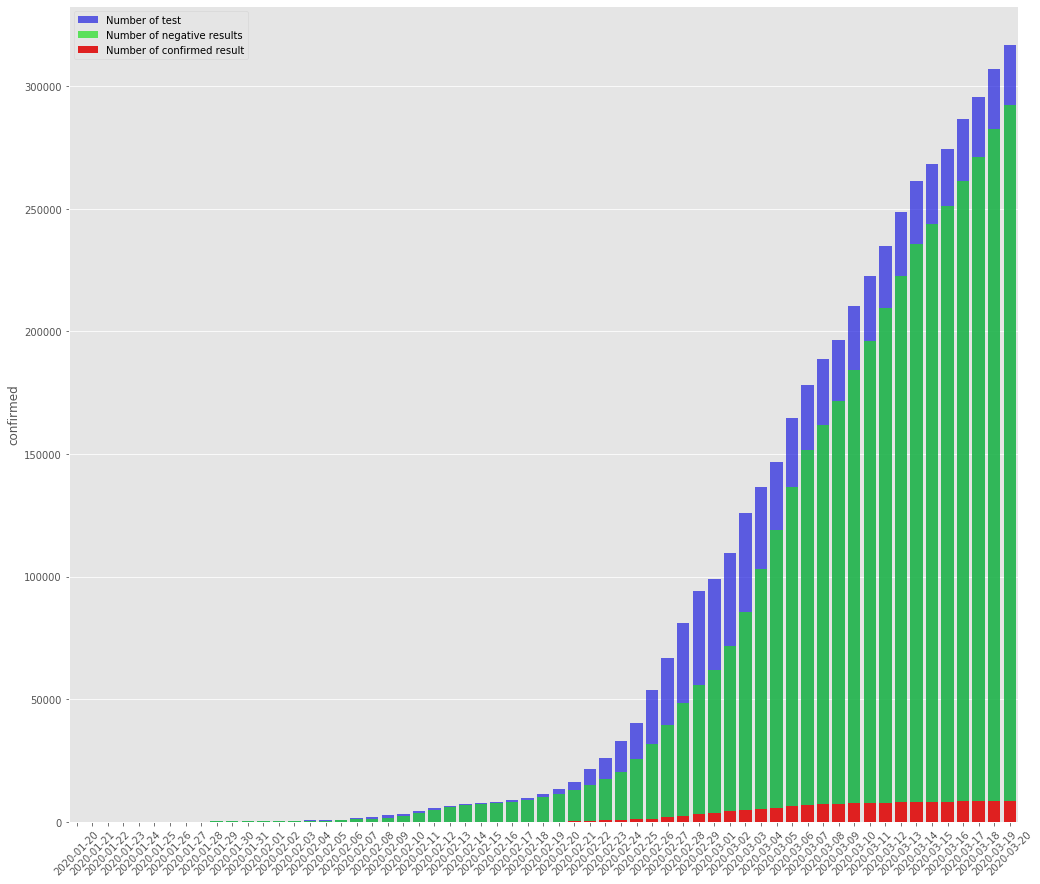

In [6]:
plt.subplots(figsize = (17, 15))
date_list = [day for day in time.date]
sns.barplot(x = date_list, y = time["test"], color = "b", label = "Number of test", alpha = 0.7)
sns.barplot(x = date_list, y = time["negative"], color = "lime", label = "Number of negative results", alpha = 0.7)
sns.barplot(x = date_list, y = time["confirmed"], color = "red", label = "Number of confirmed result", alpha = 1)
plt.legend()
plt.xticks(rotation = 45)
plt.show()

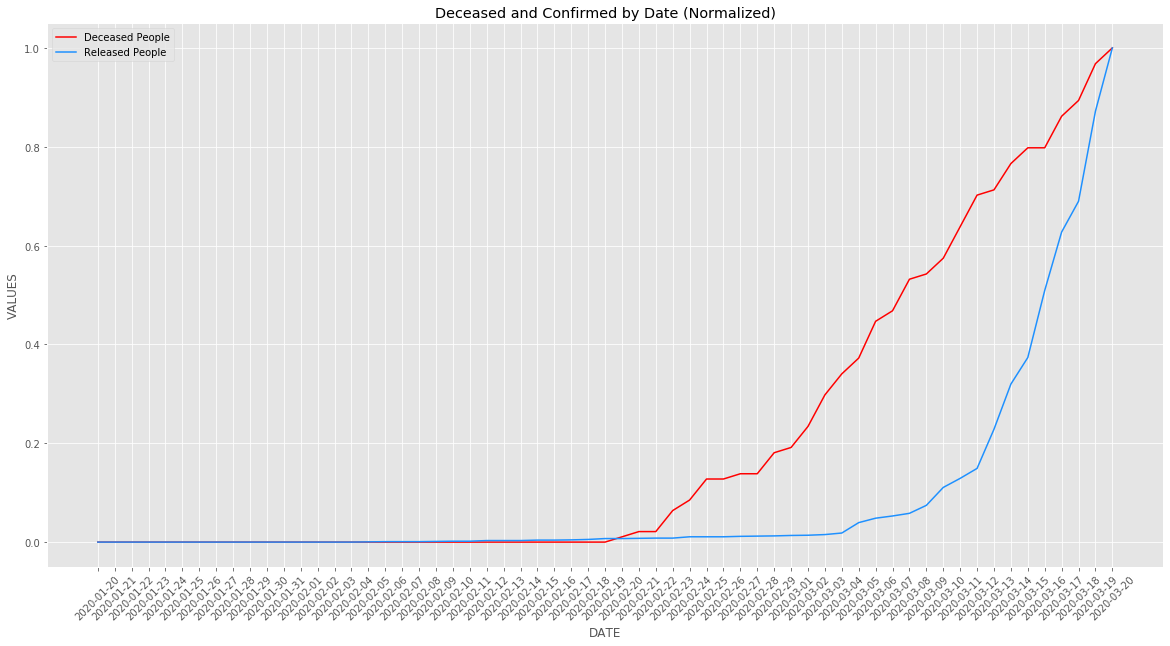

In [7]:
confirmednorm = time["confirmed"] / max(time["confirmed"])
deceasednorm = time["deceased"] / max(time["deceased"])
releasednorm = time["released"] / max(time["released"])

norm_data = pd.DataFrame({"confirmed" : confirmednorm, "deceased" : deceasednorm, "released" : releasednorm})

fig, axes = plt.subplots(figsize = (20, 10))
axes = sns.lineplot(x = time["date"], y = "deceased", data = norm_data, color = "red", label = "Deceased People", markers = True)
axes = sns.lineplot(x = time["date"], y = "released", data = norm_data, color = "dodgerblue", label = "Released People", err_style="bars", markers = True)
plt.xticks(rotation = 45)
plt.xlabel("DATE")
plt.ylabel("VALUES")
plt.title("Deceased and Confirmed by Date (Normalized)")
plt.legend()
plt.show()

In [8]:
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [9]:
timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
date         171 non-null object
time         171 non-null int64
age          171 non-null object
confirmed    171 non-null int64
deceased     171 non-null int64
dtypes: int64(3), object(2)
memory usage: 6.8+ KB


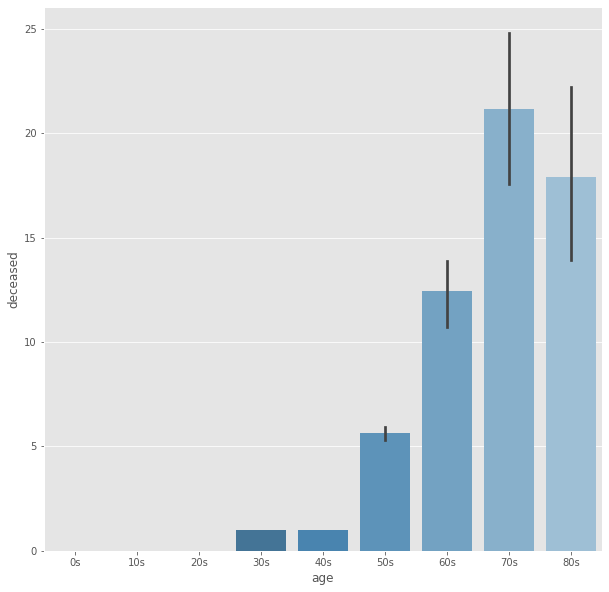

In [10]:
fig, axes = plt.subplots(figsize = (10, 10))
axes = sns.barplot(x = "age", y = "deceased", data = timeage, palette = "Blues_d")

In [11]:
timeage["age"] = timeage["age"].apply(lambda x : int(x[:-1]))
timeage["age"].value_counts()

80    19
70    19
60    19
50    19
40    19
30    19
20    19
10    19
0     19
Name: age, dtype: int64

In [12]:
patientinfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [13]:
patientinfo["state"].value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

In [14]:
patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
patient_id            2218 non-null int64
global_num            1314 non-null float64
sex                   2073 non-null object
birth_year            1764 non-null float64
age                   1957 non-null object
country               2218 non-null object
province              2218 non-null object
city                  2153 non-null object
disease               19 non-null object
infection_case        1163 non-null object
infection_order       42 non-null float64
infected_by           469 non-null float64
contact_number        411 non-null float64
symptom_onset_date    193 non-null object
confirmed_date        2077 non-null object
released_date         223 non-null object
deceased_date         32 non-null object
state                 2130 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 312.0+ KB


In [20]:
patientinfo = patientinfo[patientinfo["age"].isna() == False]
patientinfo["age"].isnull().sum()

0

In [21]:
patientinfo["age"] = patientinfo["age"].apply(lambda x : int(x[:-1]))
patientinfo["age"].value_counts()

20     467
50     385
40     303
30     251
60     229
70     117
80      84
10      74
0       29
90      17
100      1
Name: age, dtype: int64

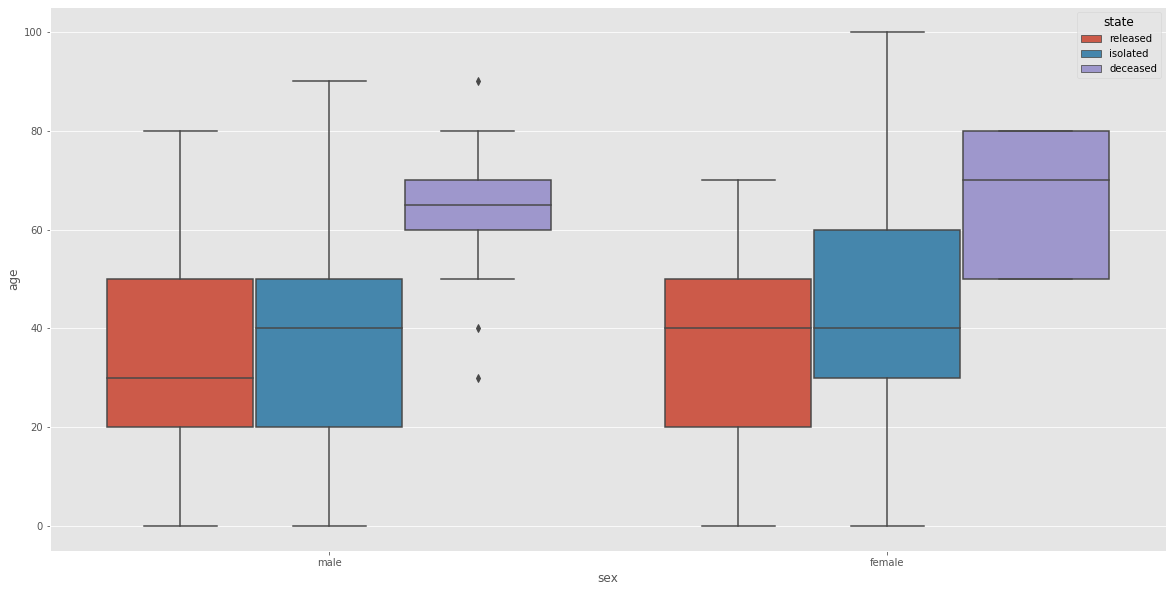

In [23]:
patientinfo["age"] = patientinfo["age"].astype(int)
fig, axes = plt.subplots(figsize = (20, 10))
axes = sns.boxplot(x = "sex", y = "age", hue = "state", data = patientinfo)

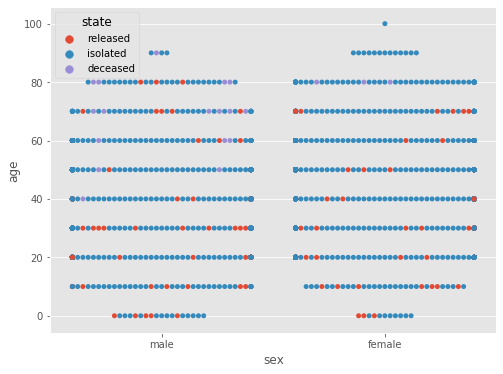

In [24]:
fig, axes = plt.subplots(figsize = (8, 6))
axes = sns.swarmplot(x = "sex", y = "age", hue = "state", data = patientinfo)

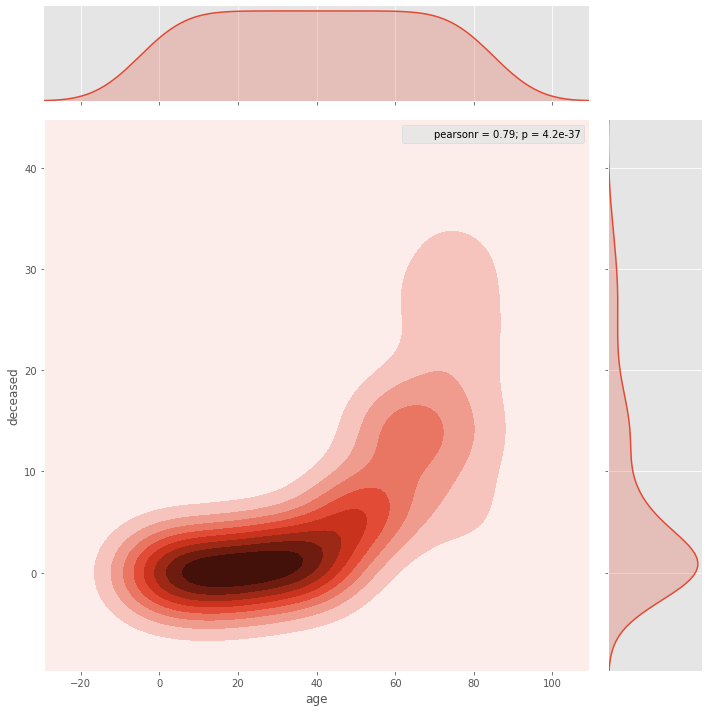

In [35]:
from scipy import stats
timeage["age"] = timeage["age"].astype(float)
sns.jointplot(x = "age", y = "deceased", data = timeage, kind="kde",size = 10).annotate(stats.pearsonr)
plt.show()

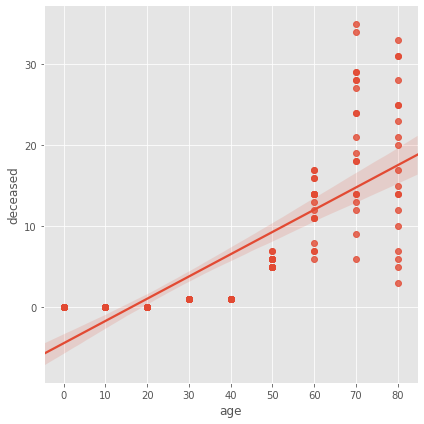

In [37]:
sns.lmplot(x = "age", y = "deceased", data = timeage, size = 6);

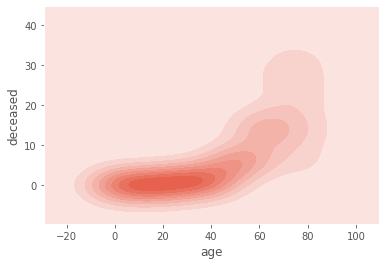

In [38]:
sns.kdeplot(timeage["age"], timeage["deceased"], shade = True)

In [39]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [41]:
confirmed_ratio = time["confirmed"] / time["test"]
negative_ratio = time["negative"] / time["test"]
ratio = pd.DataFrame({"Confirmed_ratio" : confirmed_ratio, "Negative_ratio" : negative_ratio})
ratio.head()

,Confirmed_ratio,Negative_ratio
0,1.000000,0.000000
1,1.000000,0.000000
2,0.250000,0.750000
3,0.045455,0.954545
4,0.074074,0.925926


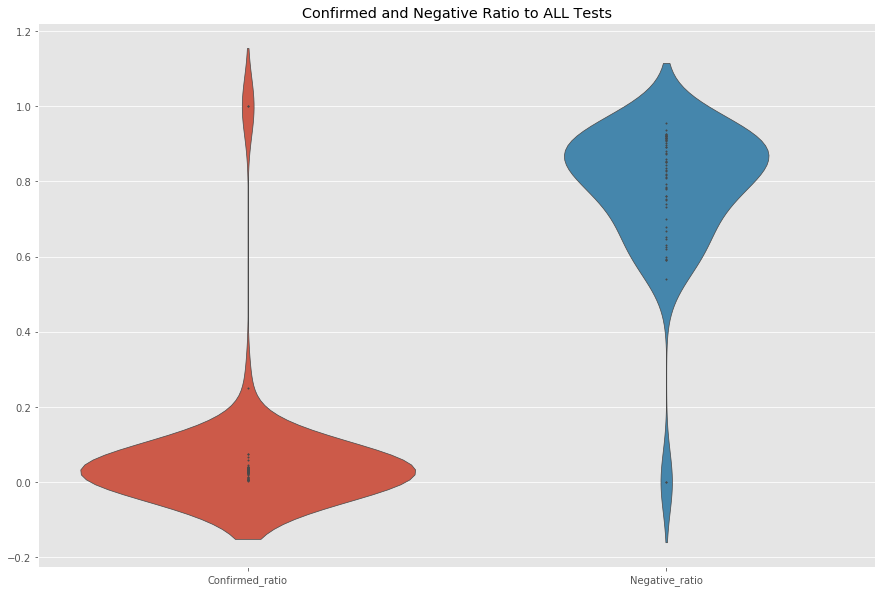

In [42]:
plt.subplots(figsize = (15, 10))
sns.violinplot(data = ratio, inner = "point", linewidth = 0.7)
plt.title("Confirmed and Negative Ratio to ALL Tests")
plt.show()

In [44]:
deceased_confirmed_relation = pd.concat([time["deceased"], time["confirmed"]], axis = 1)
deceased_confirmed_relation.head()

,deceased,confirmed
0,0,1
1,0,1
2,0,1
3,0,1
4,0,2


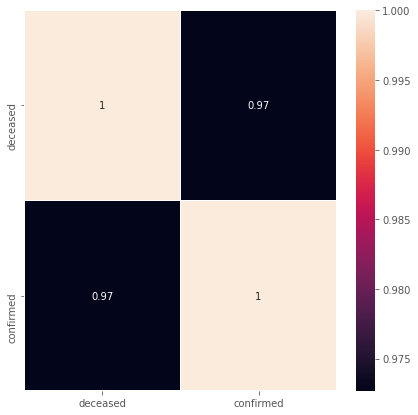

In [47]:
fig, axes = plt.subplots(figsize = (7, 7))
axes = sns.heatmap(deceased_confirmed_relation.corr(), annot = True, lw = 0.6)

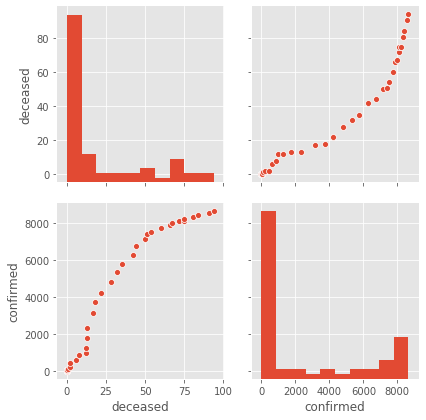

In [48]:
sns.pairplot(deceased_confirmed_relation, size = 3)
plt.show()

In [49]:
timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


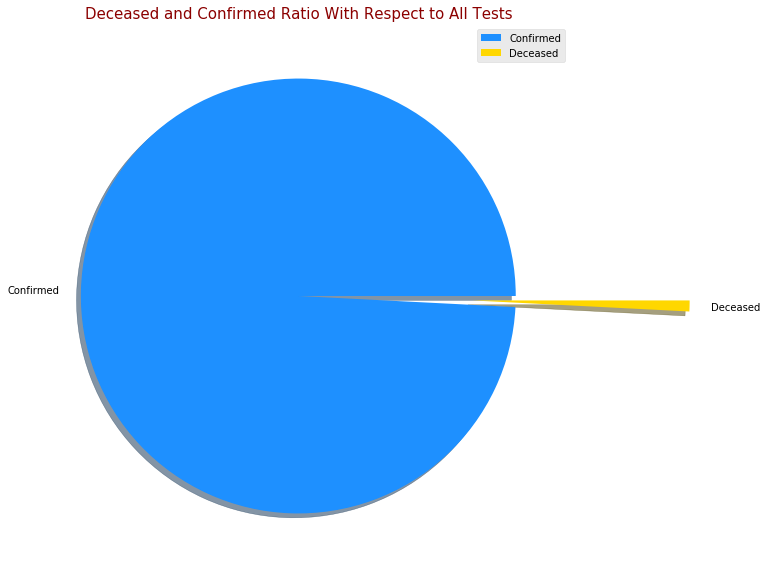

In [52]:
timegender = timegender[timegender["sex"].isna() == False]
labels = ["Confirmed", "Deceased"]
colors = ["dodgerblue", "gold"]
explode = (0, 0.8)
sizes = [np.mean(timegender["confirmed"]), np.mean(timegender["deceased"])]

plt.figure(figsize = (10, 10))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, shadow = True, pctdistance = 0.7)
plt.title('Deceased and Confirmed Ratio With Respect to All Tests',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

In [53]:
timeprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

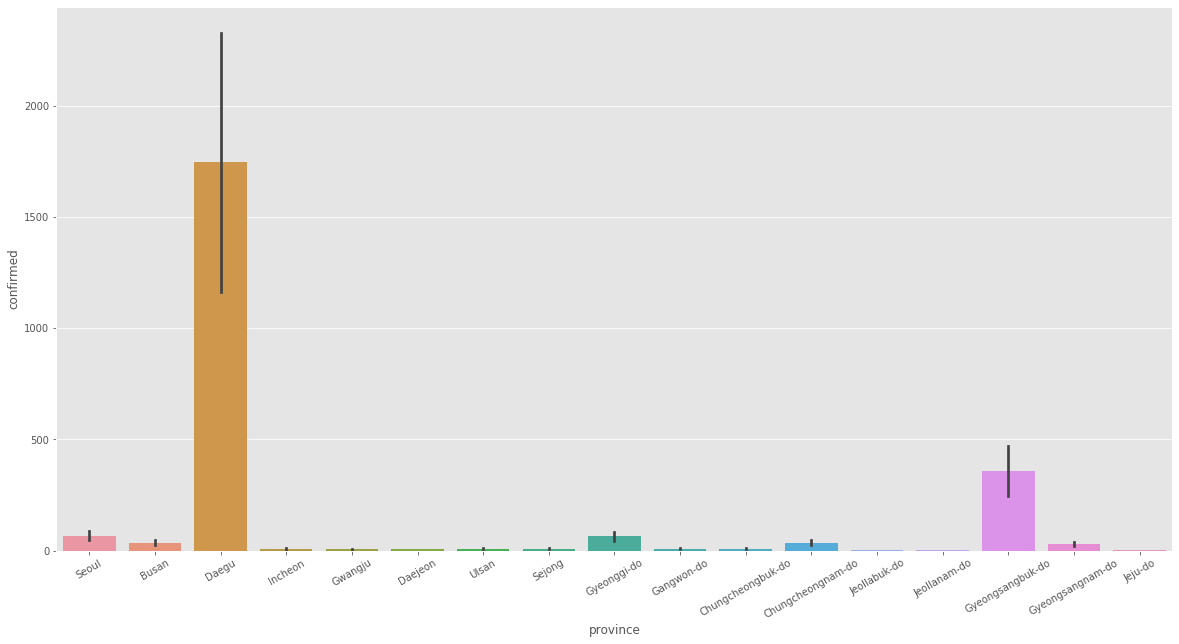

In [60]:
axes = plt.subplots(figsize = (20, 10))
axes = sns.barplot(x = "province", y = "confirmed", data = timeprovince)
plt.xticks(rotation = 30)